# Define parameters

In [11]:
%matplotlib widget
import numpy as np
import os, sys
module_path = os.path.abspath(os.path.join('funcs'))
if module_path not in sys.path:
    sys.path.append(module_path)


from physical_models import Lorenz63
from create import create_truth, create_ensemble
from plotResults import plot_truth
rng = np.random.default_rng(0)


t_lyap = Lorenz63.t_lyap
dt_t = 0.015

true_params = dict(model=Lorenz63,
                   t_start=t_lyap * 10,
                   t_stop=t_lyap * 80,
                   t_max=100 * t_lyap,
                   Nt_obs=(t_lyap * .25) // dt_t,
                   dt=dt_t,
                   rho=28.,
                   sigma=10.,
                   beta=8. / 3.,
                   psi0=rng.random(3) + 10,
                   std_obs=0.005,
                   noise_type='gauss,additive',
                   observe_dims=[0, 1]
                   )

forecast_params = dict(filter='EnKF',
                       m=50,
                       dt=dt_t,
                       model=Lorenz63,
                       est_a=dict(rho=(25., 35.),
                                  beta=(2, 4),
                                  sigma=(5, 15)),
                       std_psi=0.3,
                       alpha_distr='uniform',
                       inflation=1.01,
                       observe_dims=true_params['observe_dims']
                       )

rng = np.random.default_rng(0)


truth = create_truth(**true_params)
ensemble = create_ensemble(**forecast_params)
# plot_truth(**truth)

Model dict_keys(['observe_dims', 'model']) not assigned


# Run simulation

In [15]:

from DA import dataAssimilation


y_obs, t_obs = [truth[key].copy() for key in ['y_obs', 't_obs']]

filter_ens = dataAssimilation(ensemble.copy(), y_obs=y_obs, t_obs=t_obs, std_obs=0.01)


 ------------------ Lorenz63 Model Parameters ------------------ 
	 Nq = 1
	 beta = 2.66667
	 dt = 0.015
	 rho = 28.0
	 sigma = 10.0

 ---------------- NoBias bias model parameters --------------- 
	 N_ens = 1
	 bayesian_update = False
	 biased_observations = False
	 upsample = 1

 -------------------- ASSIMILATION PARAMETERS -------------------- 
 	 Filter = EnKF  
	 bias = NoBias 
 	 m = 50 
 	 Time steps between analysis = None 
 	 Inferred params = ['rho', 'beta', 'sigma'] 
 	 Inflation = 1.01 
 	 Ensemble std(psi0) = 0.3
 	 Ensemble std(alpha0) = {'rho': (25.0, 35.0), 'beta': (2, 4), 'sigma': (5, 15)}
 	 Number of analysis steps = 287, t0=11.04, t1=88.26
 --------------------------------------------
Elapsed time to first observation: 4.0527260303497314 s
Assimilation progress: 
	0 % 10% 20% 29% 39% 49% 59% 68% 78% 88% 100% ----------------

Elapsed time during assimilation: 4.645163059234619 s


# Plot results

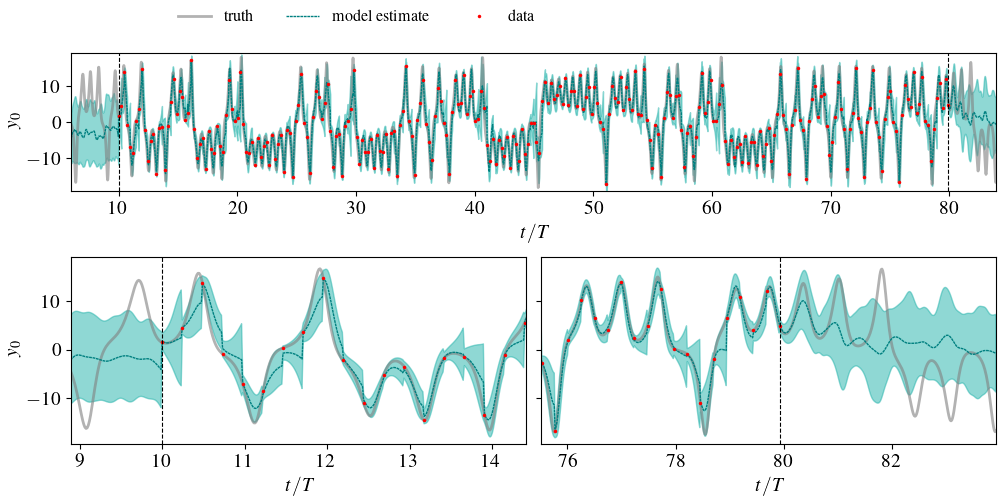

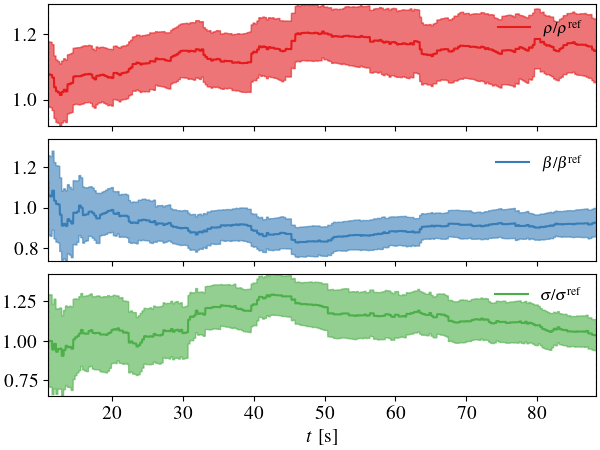

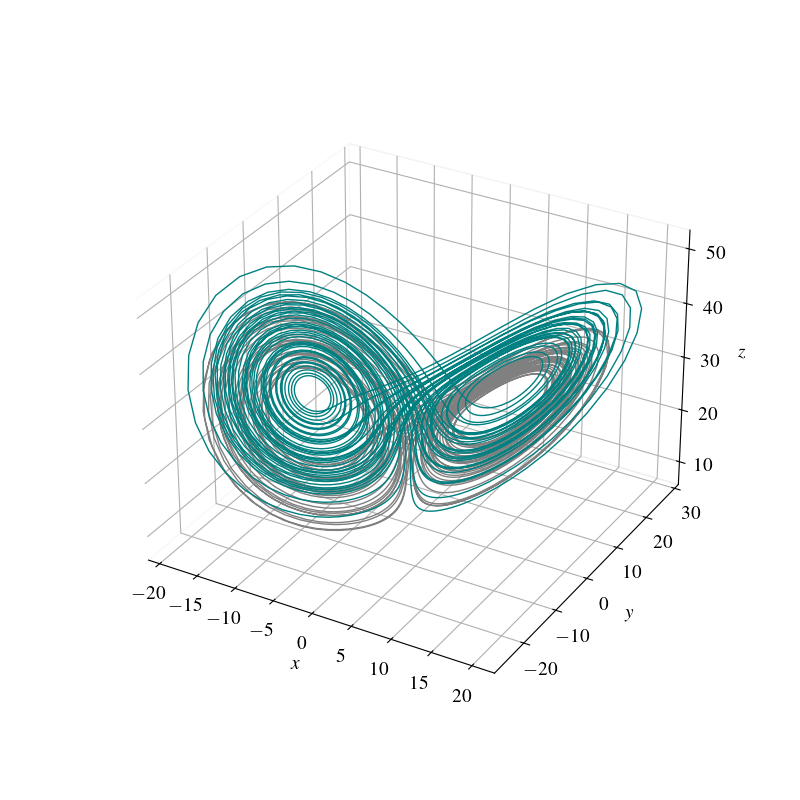

In [16]:
from plotResults import plot_timeseries, plot_parameters, plot_attractor

# Visualize attractors
case0 = truth['case'].copy()
case1 = filter_ens.copy()

# Forecast the ensemble further without assimilation
ens = filter_ens.copy()
psi, t = ens.time_integrate(int(4 * t_lyap / ens.dt), averaged=False)
ens.update_history(psi, t)

plot_timeseries(ens, truth, reference_t=t_lyap, plot_ensemble_members=False)
plot_parameters(ens, truth, reference_p=true_params)

# Forecast both cases
Nt = 40 * int(t_lyap / filter_ens.dt)
psi0, t0 = case0.time_integrate(Nt=Nt)
psi1, t1 = case1.time_integrate(Nt=Nt, averaged=True)

plot_attractor([psi0, psi1], color=['gray', 'teal'])
